# PROBLEMA 1. PROTEGIENDO LA ETSISI DE ATAQUES DE RED 

In [22]:
import pandas as pd
import numpy as np

Cargamos el dataset

In [24]:
df = pd.read_csv("trazas_red.csv")
df_labels_red = pd.read_csv("trazas_red.csv")

In [25]:
df

,IRC,Telnet,DHCP,Rate,psh_flag_number,IPv,ARP,ack_flag_number,HTTPS,LLC,...,AVG,DNS,HTTP,rst_flag_number,IAT,Covariance,Duration,flow_duration,Variance,label
0,0.0,0.0,0.0,1.397840,0.0,1.0,0.0,0.0,0.0,1.0,...,591.807000,0.0,0.0,0.0,8.367716e+07,0.000000,63.78,0.000000,0.00,Mirai-greeth_flood
1,0.0,0.0,0.0,2.130290,1.0,1.0,0.0,1.0,0.0,1.0,...,54.000000,0.0,0.0,0.0,8.333181e+07,0.000000,64.00,0.000000,0.00,DDoS-PSHACK_Flood
2,0.0,0.0,0.0,7.248154,0.0,1.0,0.0,0.0,0.0,1.0,...,499.266282,0.0,0.0,0.0,8.365140e+07,18999.091436,82.46,0.007771,0.40,Mirai-greip_flood
3,0.0,0.0,0.0,4.346313,0.0,1.0,0.0,0.0,0.0,1.0,...,54.435978,0.0,0.0,1.0,8.297254e+07,0.570149,64.00,0.327774,0.17,DoS-SYN_Flood
4,0.0,0.0,0.0,8829.262382,0.0,1.0,0.0,0.0,0.0,1.0,...,50.274942,0.0,0.0,0.0,8.301656e+07,2.071866,65.91,0.100559,0.08,DoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701744,0.0,0.0,0.0,48.738956,0.0,1.0,0.0,0.0,0.0,1.0,...,54.000000,0.0,0.0,0.0,8.303769e+07,0.000000,64.00,0.000000,0.00,DDoS-TCP_Flood
701745,0.0,0.0,0.0,19.220050,0.0,1.0,0.0,0.0,0.0,1.0,...,54.000000,0.0,0.0,0.0,8.336199e+07,0.000000,64.00,0.000000,0.00,DDoS-SynonymousIP_Flood
701746,0.0,0.0,0.0,756.283226,0.0,1.0,0.0,0.0,0.0,1.0,...,876.562241,0.0,0.0,0.0,8.337042e+07,311678.811559,64.00,0.109663,0.95,DDoS-UDP_Fragmentation
701747,0.0,0.0,0.0,18049.510038,0.0,1.0,0.0,0.0,0.0,1.0,...,57.255457,0.0,0.0,0.0,8.310303e+07,809.610955,64.39,0.037309,0.19,DDoS-UDP_Flood


# 1.  Realiza un estudio cualitativo del dataset, describiendo lo máximo posible qué son las diferentes características y tipos de ataque de red. Es importante que, dado que existen muchos tipos de ataque  puedas agruparlos para lograr mejores explicaciones de los datos

- Notamos la presencia de varias columnas que representan diferentes protocolos de red (IRC, Telnet, DHCP, HTTP, HTTPS...). Estas columnas probablemente indiquen la presencia o la actividad de esos protocolos en una conexión particular con un booleano .
- Otras columnas como ack_flag_number, psh_flag_number, syn_count, fin_flag_number están asociadas a los flujos TCP/IP y sus características.
- Las columnas de métricas como Rate, Tot sum, Srate, Drate, Duration, y flow_duration indican métricas de rendimiento en los flujos de datos de la red.
- Finalmente la columna label indica el tipo de ataque que presenta las características definidas en la fila; viendose distintos tipos de DDoS, DoS, ataques del malware mirai, VulnerabilityScan, injecciones de comandos y sql, ataques de fuerza bruta por medio de un diccionario y un largo etcetera.

In [28]:
df.shape

(701749, 47)

Vemos que tenemos unos 700000 ejemplos con 47 columnas, luego tendremos que hacer una reducción de características para quedarnos con las relevantes para el entrenamiento.

In [30]:
# Resumen de las columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701749 entries, 0 to 701748
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IRC              701749 non-null  float64
 1   Telnet           701749 non-null  float64
 2   DHCP             701749 non-null  float64
 3   Rate             701749 non-null  float64
 4   psh_flag_number  701749 non-null  float64
 5   IPv              701749 non-null  float64
 6   ARP              701749 non-null  float64
 7   ack_flag_number  701749 non-null  float64
 8   HTTPS            701749 non-null  float64
 9   LLC              701749 non-null  float64
 10  ICMP             701749 non-null  float64
 11  Tot size         701749 non-null  float64
 12  Radius           701749 non-null  float64
 13  Protocol Type    701749 non-null  float64
 14  Weight           701749 non-null  float64
 15  rst_count        701749 non-null  float64
 16  syn_count        701749 non-null  floa

Tenemos todas las características de tipo float64 (numéricas) menos el label, que es tipo object y será la que tendremos que categorizar y predecir.  
Además, todas las columnas contienen todos sus datos no nulos, por lo que no necesitaremos hacer tratamiento de datos faltantes.

In [32]:
# Descripción estadística general para datos numéricos
print(df.describe())

            IRC    Telnet           DHCP          Rate  psh_flag_number  \
count  701749.0  701749.0  701749.000000  7.017490e+05    701749.000000   
mean        0.0       0.0       0.000001  9.124936e+03         0.087614   
std         0.0       0.0       0.001194  1.011320e+05         0.282733   
min         0.0       0.0       0.000000  0.000000e+00         0.000000   
25%         0.0       0.0       0.000000  2.113841e+00         0.000000   
50%         0.0       0.0       0.000000  1.587062e+01         0.000000   
75%         0.0       0.0       0.000000  1.194457e+02         0.000000   
max         0.0       0.0       1.000000  6.291456e+06         1.000000   

                 IPv            ARP  ack_flag_number          HTTPS  \
count  701749.000000  701749.000000    701749.000000  701749.000000   
mean        0.999893       0.000057         0.123360       0.055259   
std         0.010338       0.007550         0.328851       0.228485   
min         0.000000       0.000000     

Aquí podemos ver algunas métricas relevantes de las características numéricas

In [34]:
# Resumen de datos cualitativos
print(df.describe(include=['object']))

                  label
count            701749
unique               34
top     DDoS-ICMP_Flood
freq             108634


In [35]:
df["label"].value_counts()

label
DDoS-ICMP_Flood            108634
DDoS-UDP_Flood              81696
DDoS-TCP_Flood              67862
DDoS-PSHACK_Flood           61414
DDoS-SYN_Flood              60937
DDoS-RSTFINFlood            60566
DDoS-SynonymousIP_Flood     53800
DoS-UDP_Flood               49955
DoS-TCP_Flood               40016
DoS-SYN_Flood               30199
BenignTraffic               16651
Mirai-greeth_flood          14805
Mirai-udpplain              13338
Mirai-greip_flood           11203
DDoS-ICMP_Fragmentation      6765
MITM-ArpSpoofing             4594
DDoS-UDP_Fragmentation       4398
DDoS-ACK_Fragmentation       4287
DNS_Spoofing                 2774
Recon-HostDiscovery          2031
Recon-OSScan                 1516
Recon-PortScan               1286
DoS-HTTP_Flood               1101
VulnerabilityScan             565
DDoS-HTTP_Flood               444
DDoS-SlowLoris                374
DictionaryBruteForce          170
BrowserHijacking               85
SqlInjection                   64
CommandI

Tenemos 34 valores distintos para label, son demasiados, así que vamos agrupar algunos tipos de ataque para reducir las labels.

In [37]:
def categorizar_label(label):
    if 'DDoS' in label:
        return 'DDoS'
    elif 'DoS' in label:
        return 'DoS'
    elif 'Mirai' in label:
        return 'Mirai'
    elif 'Recon' in label:
        return 'Recon'
    elif 'Injection' in label:
        return 'Injection'
    elif 'Spoofing' in label:
        return 'Spoofing'
    elif 'BruteForce' in label:
        return 'BruteForce'
    elif 'Malware' in label or 'Backdoor' in label:
        return 'Malware'
    elif 'XSS' in label:
        return 'XSS'
    elif 'Uploading' in label:
        return 'Uploading'
    elif 'MITM' in label:
        return 'MITM'
    elif 'BenignTraffic' in label:
        return 'Benign'
    else:
        return 'Otro'

In [38]:
# Crear una nueva columna en el DataFrame con la categoría
df_labels_red['label'] = df['label'].apply(categorizar_label)

df["label"].nunique()

34

In [39]:
df_labels_red["label"].nunique()

12

Hemos pasado de tener 34 labels, a tener 12

In [41]:
df_labels_red["label"].value_counts()

label
DDoS          511177
DoS           121271
Mirai          39346
Benign         16651
Spoofing        7368
Recon           4866
Otro             650
BruteForce       170
Injection        127
Malware           53
XSS               41
Uploading         29
Name: count, dtype: int64

# 2. Realiza un estudio cuantitativo de las características del dataset, indicando si existen variables con alta correlación

Vamos a ver si hay datos faltantes

<Axes: >

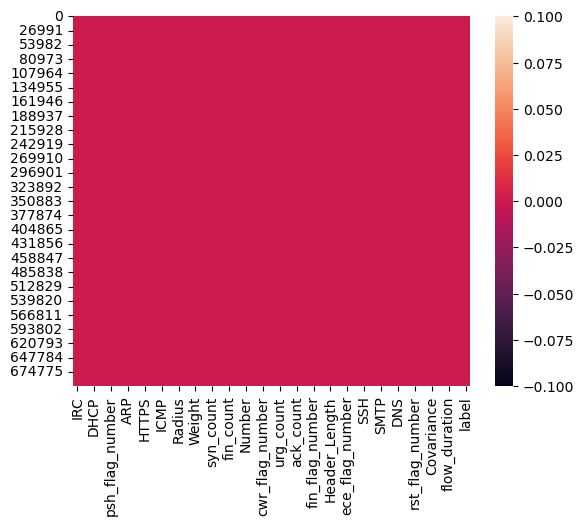

In [44]:
import seaborn as sns
sns.heatmap(df_labels_red.isnull())          # No hay datos nulos

In [45]:
df_labels_red.isna().sum().sum()

0

No hay valores faltantes.  
Vamos a dividir el dataset en las características y valor a predecir (label)

In [47]:
df_X = df_labels_red.drop(["label"], axis = "columns")

In [48]:
len(df_X.columns)

46

In [49]:
df_y = df_labels_red["label"]

In [50]:
df_X.nunique()

IRC                     1
Telnet                  1
DHCP                    2
Rate               607488
psh_flag_number         2
IPv                     2
ARP                     2
ack_flag_number         2
HTTPS                   2
LLC                     2
ICMP                    2
Tot size            28323
Radius             108963
Protocol Type        2439
Weight                 99
rst_count           17126
syn_count             633
UDP                     2
fin_count             384
Magnitue           118284
Number                 93
syn_flag_number         2
cwr_flag_number         1
Srate              607488
urg_count            7286
Tot sum             67683
ack_count             235
Std                112608
fin_flag_number         2
Max                 26139
Header_Length      137434
TCP                     2
ece_flag_number         1
Min                 21951
SSH                     2
Drate                  39
SMTP                    1
AVG                121033
DNS         

Hay columnas que tienen solo 1 valor, vamos a eliminarlas porque no aportan información


In [52]:
df_nvalores = df_X.nunique()
lista_valores_unicos = df_nvalores[df_nvalores == 1].index.to_list()
df_X.drop(lista_valores_unicos, inplace = True, axis = "columns")
len(df_X.columns)

41

Hemos reducido de 46 a 41 columnas.  
Vemos la matriz de correlación entre las características

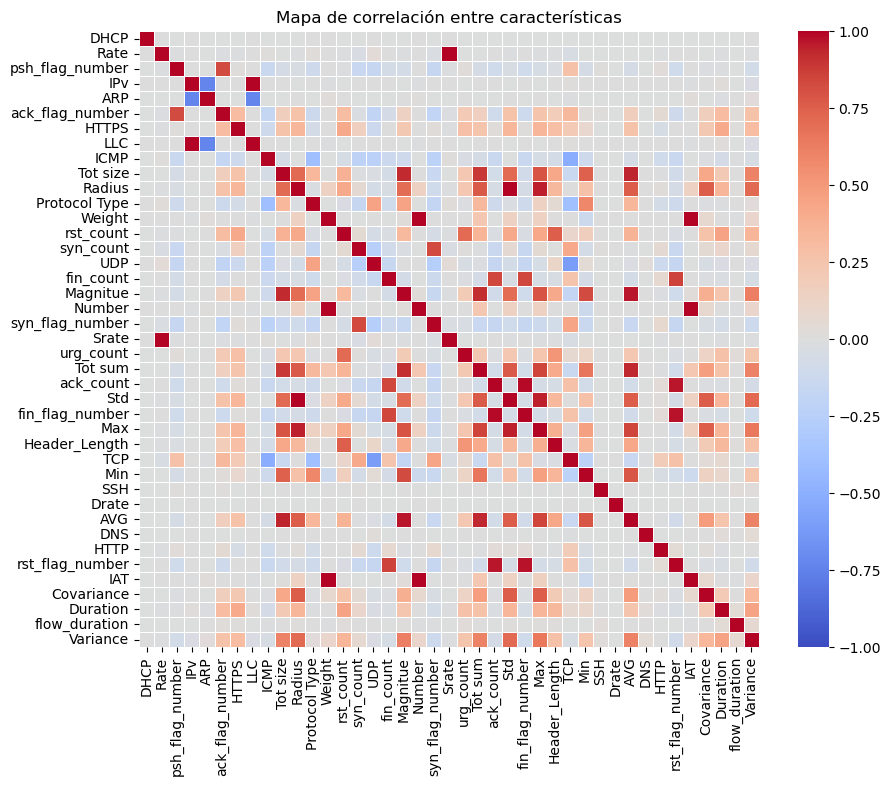

In [54]:
import matplotlib.pyplot as plt

correlation_matrix = df_X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Mapa de correlación entre características')
plt.show()

Como vemos, hay variables muy correladas directamente como por ejemplo el Max con el std, o el number con weight, y otras correladas inversamente como ARP con IPV o ARP con LLC.

In [56]:
# Vamos a eliminar las columnas muy correlacionadas (positiva o negativamente)
high_corr_pairs = np.where((correlation_matrix > 0.9) | (correlation_matrix < -0.9))
columns_to_drop = set()

# Iteramos sobre los pares correlacionados y agregamos una columna de cada par a 'columns_to_drop'
for i, j in zip(*high_corr_pairs):
    if i != j:  # No consideramos la diagonal
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        # Eliminamos la segunda columna
        if col1 not in columns_to_drop:
            columns_to_drop.add(col2)

cols_to_drop = list(columns_to_drop)
df_X.drop(cols_to_drop, inplace = True, axis = "columns")
len(df_X.columns)

31

Hemos pasado de 41 a 31 columnas.  
Vamos a aplicar VarianceThreshold para eliminar aquellas columnas que tienen muy poca varianza en sus datos, pues seguramente aproten muy poca información.

In [58]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

# Aplicamos VarianceThreshold
df_X = pd.DataFrame(selector.fit_transform(df_X), columns=df_X.columns[selector.get_support()])

df_X

,Rate,psh_flag_number,ack_flag_number,HTTPS,ICMP,Tot size,Radius,Protocol Type,Weight,rst_count,...,Tot sum,ack_count,Header_Length,TCP,Min,HTTP,Covariance,Duration,flow_duration,Variance
0,1.397840,0.0,0.0,0.0,0.0,588.14,0.000000,46.59,141.55,0.01,...,6212.14,0.00,2.06,0.0,588.14,0.0,0.000000,63.78,0.000000,0.00
1,2.130290,1.0,1.0,0.0,0.0,54.00,0.000000,6.00,141.55,1.00,...,567.00,0.00,54.00,1.0,54.00,0.0,0.000000,64.00,0.000000,0.00
2,7.248154,0.0,0.0,0.0,0.0,523.34,119.606136,42.14,141.55,0.01,...,5318.32,0.00,3.30,0.0,363.68,0.0,18999.091436,82.46,0.007771,0.40
3,4.346313,0.0,0.0,0.0,0.0,54.48,0.439334,6.00,141.55,0.12,...,572.52,0.00,96.06,1.0,54.00,0.0,0.570149,64.00,0.327774,0.17
4,8829.262382,0.0,0.0,0.0,0.0,52.90,0.574124,16.78,141.55,0.15,...,529.98,0.03,42845.28,0.0,50.00,0.0,2.071866,65.91,0.100559,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701744,48.738956,0.0,0.0,0.0,0.0,54.00,0.000000,6.00,141.55,0.00,...,567.00,0.00,54.00,1.0,54.00,0.0,0.000000,64.00,0.000000,0.00
701745,19.220050,0.0,0.0,0.0,0.0,54.00,0.000000,6.00,141.55,0.00,...,567.00,0.00,54.00,1.0,54.00,0.0,0.000000,64.00,0.000000,0.00
701746,756.283226,0.0,0.0,0.0,0.0,938.00,769.472095,17.00,141.55,0.00,...,9561.00,0.00,126040.50,0.0,362.00,0.0,311678.811559,64.00,0.109663,0.95
701747,18049.510038,0.0,0.0,0.0,0.0,52.49,16.948363,16.84,141.55,0.00,...,565.68,0.00,24399.50,0.0,52.01,0.0,809.610955,64.39,0.037309,0.19


Hemos reducido de 31 a 25 columnas.

# 3. Haz uso de técnicas de reducción de dimensionalidad para lograr visualizaciones que permitan entender los datos. El objetivo fundamental es lograr visualizaciones que mejor consigan separar los diferentes tipos de ataque de red entre si.

## PCA

Primero vamos a hacer PCA a 2 y 3 dimensiones

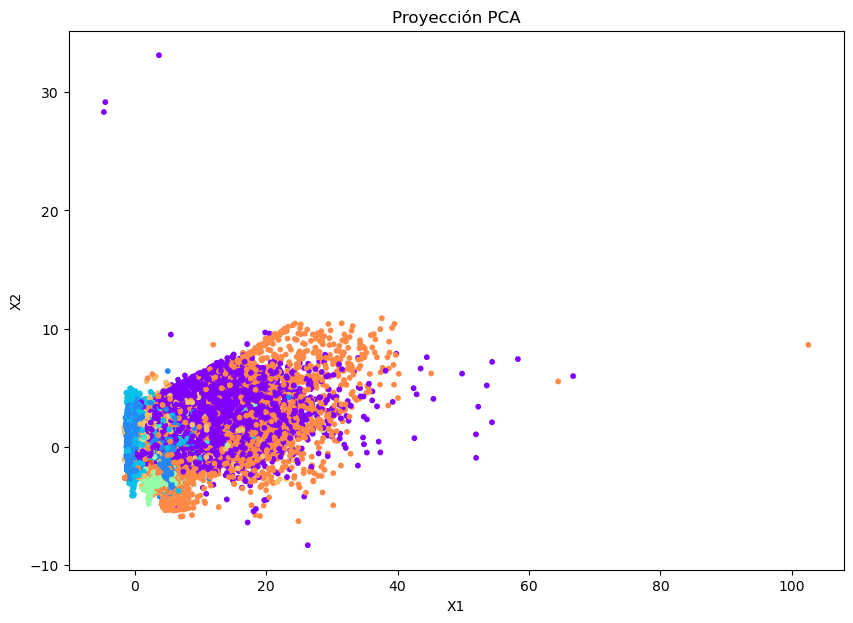

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Hacemos un label encoder de las categorías de las posibles etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_y)

# Estandarizamos los datos
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)

# Aplicamos Análisis de Componentes Principales para reducir la dimensionalidad de los datos a 2 dimensiones para visualizarlos
X_low = PCA(n_components=2).fit_transform(df_X_scaled)
plt.figure(figsize=(10,7))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Proyección PCA')
plt.scatter(X_low[:,0], X_low[:,1], c=y_encoded, cmap='rainbow', s=10)  # Los colores de los datos corresponden a su label
plt.show()

Podemos ver que hay outliers, vamos a eliminarlos para poder ver mejor los datos

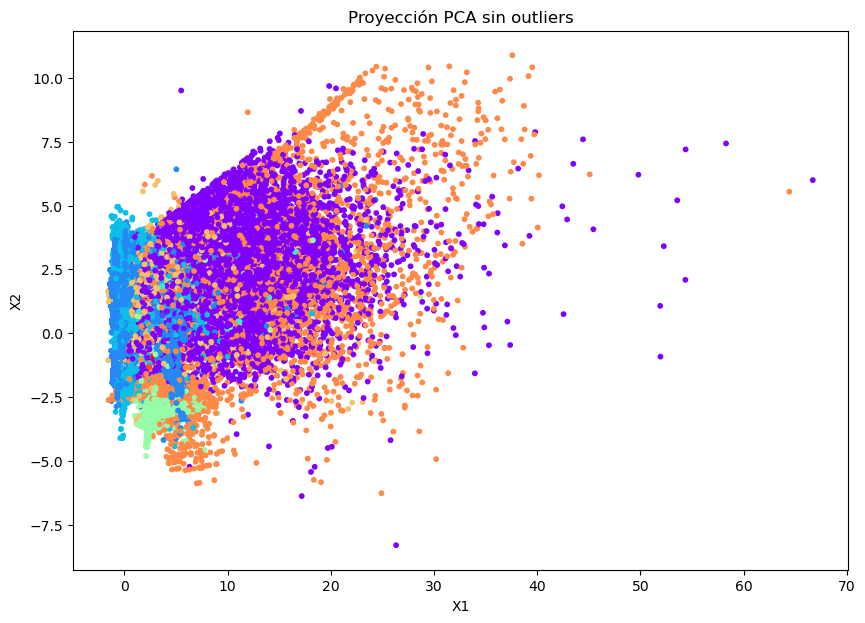

In [65]:
# Definimos un rango para X1 y X2
x1_min, x1_max = -5, 70 
x2_min, x2_max = -9, 13

# Filtramos los puntos que estén dentro del rango
mask = (X_low[:, 0] >= x1_min) & (X_low[:, 0] <= x1_max) & (X_low[:, 1] >= x2_min) & (X_low[:, 1] <= x2_max)

# Filtramos tanto los datos de X como las etiquetas
X_PCA_2d = X_low[mask]
y_PCA_2d = y_encoded[mask]

plt.figure(figsize=(10,7))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Proyección PCA sin outliers')
plt.scatter(X_PCA_2d[:, 0], X_PCA_2d[:, 1], c=y_PCA_2d, cmap='rainbow', s=10)
plt.show()


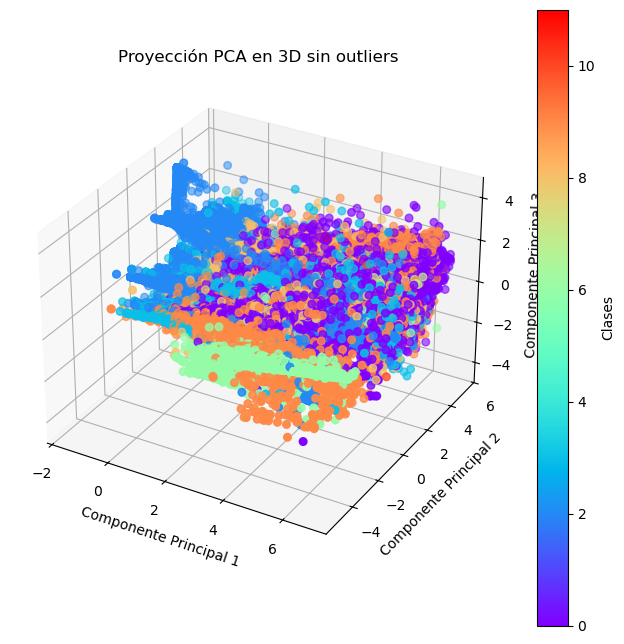

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Aplicamos PCA para reducir a 3 dimensiones
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(df_X_scaled)

# Eliminamos outliers utilizando z-score
z_scores = np.abs(stats.zscore(X_pca_3d))
threshold = 3  # Umbral para detectar outliers
mask = (z_scores < threshold).all(axis=1)

# Filtramos los datos para eliminar los outliers
X_pca_3d_filtered = X_pca_3d[mask]
y_pca_3d_filtered = y_encoded[mask]

# Crear una figura en 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')  # Proyección 3D

# Etiquetamos los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Proyección PCA en 3D sin outliers')

# Scatter plot
scatter = ax.scatter(X_pca_3d_filtered[:, 0], X_pca_3d_filtered[:, 1], X_pca_3d_filtered[:, 2], 
                     c=y_pca_3d_filtered, cmap='rainbow', s=30)

# Creamos barra de colores para la leyenda
cbar = plt.colorbar(scatter)
cbar.set_label('Clases')

plt.show()

## Tuncated SVD

Ahora vamos a utilizar Truncated SVD para la selección de características, de la misma forma que hicimos anteriormente, en dos y tres dimensiones

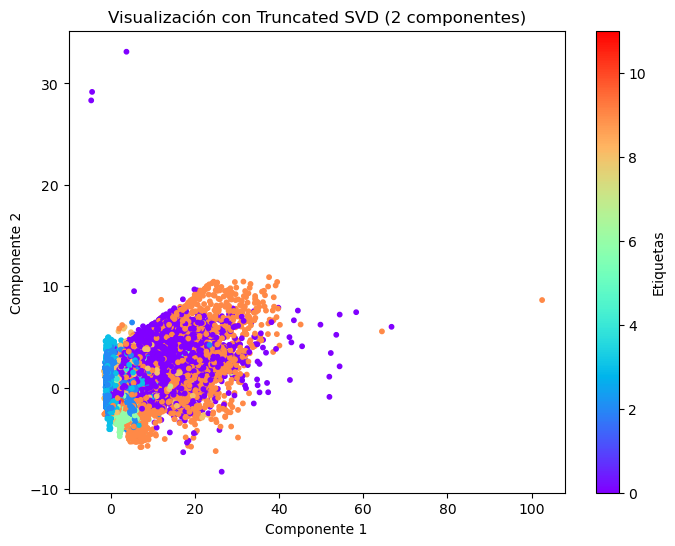

In [69]:
from sklearn.decomposition import TruncatedSVD

# Reducimos a 2 componentes
svd_2d = TruncatedSVD(n_components=2)
df_X_svd_2d = svd_2d.fit_transform(df_X_scaled)

# Visualizamos los datos una vez hecha la reducción
plt.figure(figsize=(8, 6))
plt.scatter(df_X_svd_2d[:, 0], df_X_svd_2d[:, 1], c=y_encoded, cmap='rainbow', s=10)
plt.title('Visualización con Truncated SVD (2 componentes)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Etiquetas')
plt.show()

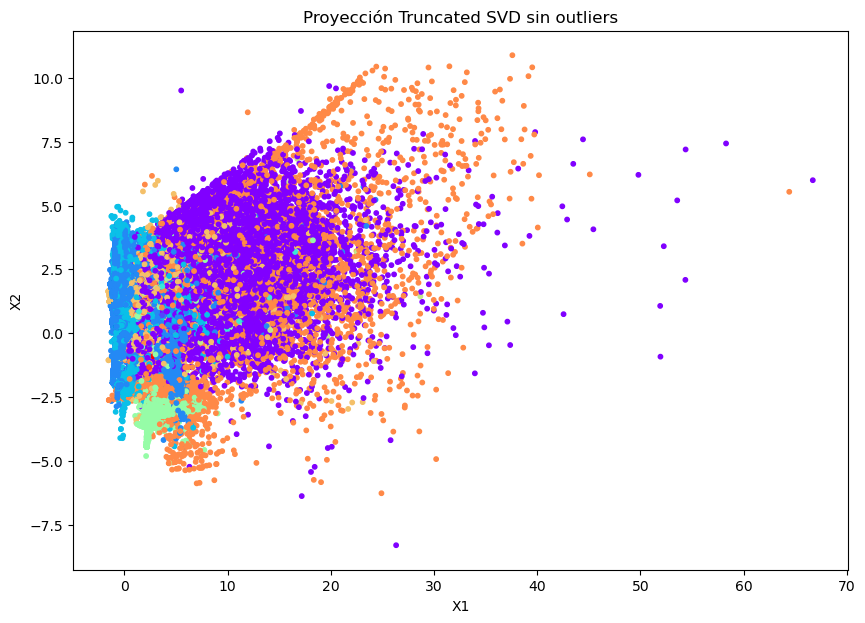

In [70]:
# Establecemos los rangos
x1_min, x1_max = -5, 70 
x2_min, x2_max = -9, 13

# Filtramos los puntos que estén dentro del rango
mask = (df_X_svd_2d[:, 0] >= x1_min) & (df_X_svd_2d[:, 0] <= x1_max) & (df_X_svd_2d[:, 1] >= x2_min) & (df_X_svd_2d[:, 1] <= x2_max)

# Filtramos tanto los datos de X como las etiquetas
X_filtered_SVD = df_X_svd_2d[mask]
y_filtered_SVD = y_encoded[mask]

# Realizamos la visualización
plt.figure(figsize=(10, 7))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Proyección Truncated SVD sin outliers')
plt.scatter(X_filtered_SVD[:, 0], X_filtered_SVD[:, 1], c=y_filtered_SVD, cmap='rainbow', s=10)
plt.show()

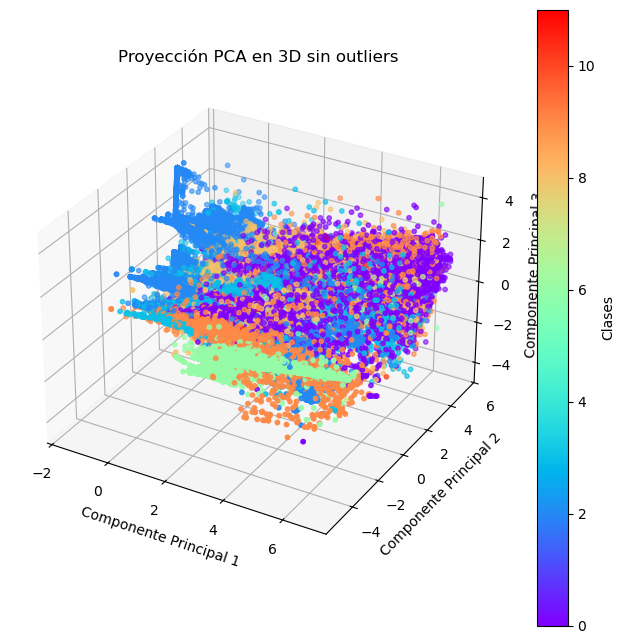

In [71]:
# Eliminamos outliers utilizando z-score
svd_3d = TruncatedSVD(n_components=3)
df_X_svd_3d = svd_3d.fit_transform(df_X_scaled)

z_scores = np.abs(stats.zscore(df_X_svd_3d ))
threshold = 3  # Umbral para detectar outliers
mask = (z_scores < threshold).all(axis=1)

# Filtramos los datos para eliminar los outliers
X_svd_3d_filtered = df_X_svd_3d [mask]
y_svd_3d_filtered = y_encoded[mask]

# Creamos una figura en 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')  # Proyección 3D

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Proyección PCA en 3D sin outliers')

# Scatter plot
scatter = ax.scatter(X_svd_3d_filtered[:, 0], X_svd_3d_filtered[:, 1], X_svd_3d_filtered[:, 2], 
                     c=y_svd_3d_filtered, cmap='rainbow', s=10)

# Creamos barra de colores para la leyenda
cbar = plt.colorbar(scatter)
cbar.set_label('Clases')

plt.show()

Como vemos, sale prácticamente igual que el PCA porque son métodos muy similares y los datos no son sparse

## ISOMAP

Vamos a reducir el Dataset ya que es muy grande y la reducción Isomap es muy costosa

In [75]:
df_X_scaled.shape

(701749, 25)

Reducimos los datos porque tarda mucho en hacer reducción de dimensionalidad

In [77]:
from sklearn.model_selection import train_test_split
from scipy.sparse import lil_matrix

# Reducimos el dataset al 5% de los datos
X_red_ISO, _, y_red_ISO, _ = train_test_split(df_X_scaled, y_encoded, train_size=0.05, random_state=42, stratify = y_encoded)
print(f"Nos quedamos con {X_red_ISO.shape[0]} datos")

# Convertimos a lil_matrix porque los datos son grandes y dispersos y así lo metemos a Isomap (para que no de warnings)
X_reduced_sparse = lil_matrix(X_red_ISO)

Nos quedamos con 35087 datos


In [78]:
from sklearn.manifold import Isomap
import time

start_time = time.time()

# Reducción Isomap a 2 dimensiones considerando los 28 vecinos más cercanos de cada punto para la reducción
isomap = Isomap(n_neighbors=28, n_components=2)
X_isomap = isomap.fit_transform(X_reduced_sparse)

end_time = time.time()

execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time/60} minutos")

El tiempo de ejecución fue: 32.139428134759264 minutos


Como vemos, tarda mucho esta reducción.  
Vamos a visualizar los datos con reducción ISOMAP

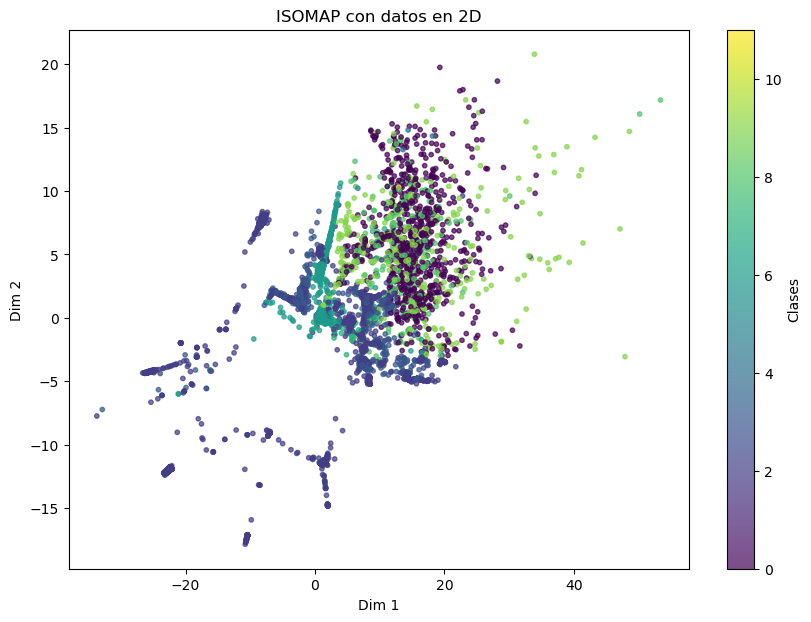

In [80]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_red_ISO, cmap='viridis', s=10, alpha=0.7)
plt.colorbar(scatter, label='Clases')
plt.title('ISOMAP con datos en 2D')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

Obtenemos una visualización algo mejor, con clases más separadas

## T-SNE

Reducimos los datos porque tarda mucho en hacer la reducción de dimensionalidad

In [84]:
from sklearn.model_selection import train_test_split

# Reducimos el dataset al 20% de los datos
X_red_TSNE, _, y_red_TSNE, _ = train_test_split(df_X_scaled, y_encoded, train_size=0.2, random_state=42, stratify = y_encoded)
print(f"Nos quedamos con {X_red_TSNE.shape[0]} datos")

Nos quedamos con 140349 datos


In [85]:
from matplotlib import offsetbox
from sklearn.manifold import TSNE
import time

start_time = time.time()

# Reducción t-SNE a dos dimensiones con perplexity = 30 (número de vecinos cercanos considerados para cada punto)
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_red_TSNE)

end_time = time.time()

execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time/60} minutos")

El tiempo de ejecución fue: 23.625426332155865 minutos


Visualizamos la reducción

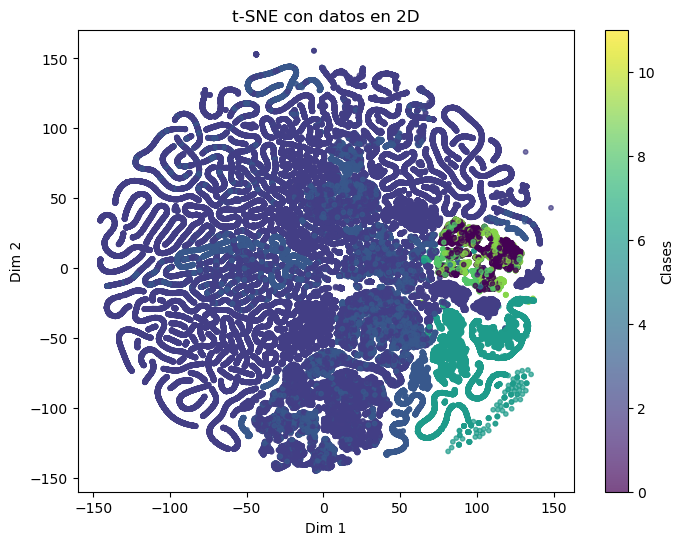

In [87]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_red_TSNE, cmap='viridis', s=10, alpha=0.7)
plt.colorbar(scatter, label='Clases')
plt.title('t-SNE con datos en 2D')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

Como podemos ver, esta es la reducción que mejor separa los datos, por ello vamos a hacer también la visualización en 3D reduciendo previamente los datos a 3 dimensiones

In [89]:
from sklearn.model_selection import train_test_split

# Reducimos el dataset al 10% de los datos
X_red_TSNE_3D, _, y_red_TSNE_3D, _ = train_test_split(df_X_scaled, y_encoded, train_size=0.1, random_state=42, stratify = y_encoded)
print(f"Nos quedamos con {X_red_TSNE_3D.shape[0]} datos")

Nos quedamos con 70174 datos


In [90]:
from matplotlib import offsetbox
from sklearn.manifold import TSNE
import time

start_time = time.time()

# Reducción t-SNE a tres dimensiones con perplexity = 30 (número de vecinos cercanos considerados para cada punto)
tsne = TSNE(n_components=3, perplexity=30)
X_tsne_3d = tsne.fit_transform(X_red_TSNE_3D)

end_time = time.time()

execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time/60} minutos")

El tiempo de ejecución fue: 22.548419157663982 minutos


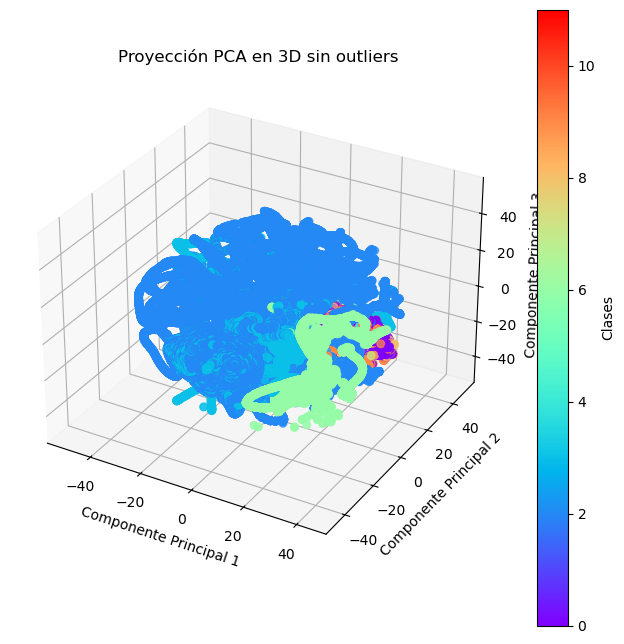

In [91]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Eliminamos outliers utilizando z-score
z_scores = np.abs(stats.zscore(X_tsne_3d))
threshold = 3  # Umbral para detectar outliers
mask = (z_scores < threshold).all(axis=1)

# Filtramos los datos para eliminar los outliers
X_tsne_3d_filtered = X_tsne_3d[mask]
y_tsne_3d_filtered = y_red_TSNE_3D[mask]

# Crear una figura en 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')  # Proyección 3D

# Etiquetamos los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Proyección PCA en 3D sin outliers')

# Scatter plot
scatter = ax.scatter(X_tsne_3d_filtered[:, 0], X_tsne_3d_filtered[:, 1], X_tsne_3d_filtered[:, 2], 
                     c=y_tsne_3d_filtered, cmap='rainbow', s=30)

# Creamos barra de colores para la leyenda
cbar = plt.colorbar(scatter)
cbar.set_label('Clases')

plt.show()

# 4. Haz uso de técnicas de reducción de dimensionalidad para lograr una mejor clasificación de las trazas de red. Realiza una comparación exhaustiva contra diferentes clasificadores dede scikit-learn, evaluando si permiten lograr mejores resultados

Primero vamos a entrenar varios modelos con los datos sin hacer reducción de dimensionalidad para ver cómo de bien entrenan los modelos y quedarnos con el que tenga mayor f1_score. Utilizamos f1_score como métrica puesto que este es más fiable que el accuracy al ser una mezcla de la precisión y el recall.  
Vamos a crear una función que ejecute el RandomForestClassifier dado que lo vamos a utilizar varias veces.

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
import time

def RandomForest(X_train, X_test, y_train, y_test):
    start_time = time.time()
    # Instanciamos el modelo
    modelo = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Entrenamos el modelo
    modelo.fit(X_train, y_train)
    
    # Predecimos en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # F1-score
    f1 = f1_score(y_test, y_pred, average='weighted') 
    print(f"F1 Score: {f1}")
    
    # Mostramos informe de clasificación
    print(classification_report(y_test, y_pred))
    
    end_time = time.time()
    
    execution_time = end_time - start_time
    print(f"El tiempo de ejecución fue: {execution_time/60} minutos")
    return f1

In [95]:
# Divididmos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, y_encoded, test_size=0.2, random_state=42)

RF_datos_sin_reduccion = RandomForest(X_train, X_test, y_train, y_test)

Accuracy: 0.9065051656572853
F1 Score: 0.9021912618218847


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3275
           1       1.00      0.03      0.05        38
           2       0.92      0.97      0.94    102118
           3       0.82      0.65      0.73     24493
           4       1.00      0.09      0.16        34
           5       0.00      0.00      0.00        13
           6       1.00      0.99      1.00      7818
           7       0.90      0.77      0.83       135
           8       0.74      0.63      0.68       958
           9       0.82      0.71      0.76      1452
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        10

    accuracy                           0.91    140350
   macro avg       0.67      0.48      0.50    140350
weighted avg       0.90      0.91      0.90    140350

El tiempo de ejecución fue: 2.078679358959198 minutos


Con MLPClassifier:

In [97]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score
import time

start_time_mlp = time.time()

# Instanciamos el modelo MLPClassifier con 2 capas ocultas de 100 neuronas cada una
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42, early_stopping = True)
mlp_model.fit(X_train, y_train)  # Entrenamos el modelo

# Predicciones y métricas del MLPClassifier
mlp_pred = mlp_model.predict(X_test)
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')
print(f"MLPClassifier F1 Score: {mlp_f1}")
print("MLPClassifier Classification Report:")
print(classification_report(y_test, mlp_pred))

end_time_mlp = time.time()
execution_time_mlp = end_time_mlp - start_time_mlp
print(f"El tiempo de ejecución para MLPClassifier fue: {execution_time_mlp / 60:.2f} minutos")


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Propietario

MLPClassifier F1 Score: 0.8905798658145042
MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3275
           1       0.36      0.13      0.19        38
           2       0.90      0.97      0.94    102118
           3       0.84      0.57      0.68     24493
           4       0.80      0.12      0.21        34
           5       0.25      0.08      0.12        13
           6       1.00      0.99      1.00      7818
           7       0.92      0.75      0.82       135
           8       0.72      0.66      0.69       958
           9       0.85      0.65      0.74      1452
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        10

    accuracy                           0.90    140350
   macro avg       0.62      0.49      0.52    140350
weighted avg       0.89      0.90      0.89    140350

El tiempo de ejecución para MLPClassifier fue: 6.42 m

C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Con KNN (también creamos función):

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import time

def KNN(X_train, X_test, y_train, y_test):
    start_time = time.time()

    # Creamos el modelo KNN
    knn_model = KNeighborsClassifier(n_neighbors = 15, weights = "distance")
    
    # Entrenamos el modelo
    knn_model.fit(X_train, y_train)
    
    # Hacemos predicciones en el conjunto de prueba
    y_pred = knn_model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score: {f1}")
    
    # Mostramos el classification report
    print(classification_report(y_test, y_pred))
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Tiempo transcurrido: {elapsed_time} segundos")
    return f1

In [100]:
KNN_datos_sin_reduccion = KNN(X_train, X_test, y_train, y_test)

Accuracy: 0.8881154257214108
F1 Score: 0.8828120403388998
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      3275
           1       0.50      0.05      0.10        38
           2       0.91      0.95      0.93    102118
           3       0.76      0.61      0.68     24493
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00        13
           6       1.00      0.99      1.00      7818
           7       0.80      0.81      0.80       135
           8       0.77      0.52      0.62       958
           9       0.79      0.57      0.66      1452
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        10

    accuracy                           0.89    140350
   macro avg       0.52      0.45      0.47    140350
weighted avg       0.88      0.89      0.88    140350

Tiempo transcurrido: 179.7039110660553 segundos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vemos que funciona mejor el RandomForestClassifier, por lo que usaremos ese, aunque también tiene sentido utilizar el KNN con la reducción de dimensionalidad hecha, ya que el objetivo de esta es hacer una mejor separación de las clases.

## Modelos utilizando reducción PCA 2D

In [103]:
X_PCA_2d = pd.DataFrame(X_PCA_2d)
X_PCA_2d

,0,1
0,2.285586,-3.725696
1,-0.186772,1.615332
2,2.673671,-2.883101
3,-0.566576,1.055869
4,-0.441007,-1.977839
...,...,...
701740,-0.726487,0.266431
701741,-0.901872,1.440188
701742,5.433759,-2.284279
701743,-0.288097,-2.022484


Divididmos en conjuntos de entrenamiento y prueba y entrenamos RandomForestClassifier y KNN

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_PCA_2d, y_PCA_2d, test_size=0.2, random_state=42)

In [106]:
RF_PCA_2D = RandomForest(X_train, X_test, y_train, y_test)

Accuracy: 0.862891791177707
F1 Score: 0.854964621741887
              precision    recall  f1-score   support

           0       0.61      0.76      0.68      3344
           1       0.00      0.00      0.00        41
           2       0.90      0.95      0.92    102291
           3       0.72      0.53      0.61     24113
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        14
           6       0.99      0.98      0.99      7986
           7       0.20      0.12      0.15       135
           8       0.40      0.28      0.33       955
           9       0.42      0.31      0.36      1414
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        13

    accuracy                           0.86    140349
   macro avg       0.35      0.33      0.34    140349
weighted avg       0.85      0.86      0.85    140349

El tiempo de ejecución fue: 2.121346620718638 minutos


In [107]:
KNN_PCA_2D = KNN(X_train, X_test, y_train, y_test)

Accuracy: 0.8630414181789682
F1 Score: 0.8571671173290444
              precision    recall  f1-score   support

           0       0.61      0.80      0.69      3344
           1       0.00      0.00      0.00        41
           2       0.90      0.94      0.92    102291
           3       0.69      0.57      0.62     24113
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        14
           6       0.99      0.98      0.99      7986
           7       0.23      0.11      0.15       135
           8       0.43      0.29      0.35       955
           9       0.48      0.31      0.38      1414
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        13

    accuracy                           0.86    140349
   macro avg       0.36      0.33      0.34    140349
weighted avg       0.86      0.86      0.86    140349

Tiempo transcurrido: 1.8440017700195312 segundos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Obtenemos un f1_score levemente mayor con KNN, por la reducción de dimensionalidad

## Modelos utilizando reducción PCA 3D

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca_3d_filtered, y_pca_3d_filtered, test_size=0.2, random_state=42)

In [111]:
RF_PCA_3D = RandomForest(X_train, X_test, y_train, y_test)

Accuracy: 0.8784681629718917
F1 Score: 0.8717674015830786
              precision    recall  f1-score   support

           0       0.55      0.75      0.64      1615
           1       0.25      0.03      0.05        35
           2       0.90      0.96      0.93    102061
           3       0.75      0.57      0.65     24325
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00         9
           6       0.99      0.99      0.99      7825
           7       0.46      0.31      0.37       121
           8       0.56      0.43      0.49       849
           9       0.55      0.35      0.43       845
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         6

    accuracy                           0.88    137717
   macro avg       0.42      0.37      0.38    137717
weighted avg       0.87      0.88      0.87    137717

El tiempo de ejecución fue: 1.8961824893951416 minutos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
KNN_PCA_3D = KNN(X_train, X_test, y_train, y_test)

Accuracy: 0.8764132242206845
F1 Score: 0.8716546336337738
              precision    recall  f1-score   support

           0       0.56      0.77      0.65      1615
           1       0.00      0.00      0.00        35
           2       0.91      0.95      0.93    102061
           3       0.72      0.60      0.65     24325
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00         9
           6       1.00      0.99      0.99      7825
           7       0.46      0.42      0.44       121
           8       0.57      0.44      0.50       849
           9       0.56      0.34      0.43       845
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         6

    accuracy                           0.88    137717
   macro avg       0.40      0.38      0.38    137717
weighted avg       0.87      0.88      0.87    137717

Tiempo transcurrido: 2.4205737113952637 segundos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Esta reducción es la que mejor f1_score obtiene.

## Modelos con datos Truncated-SVD 2D

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_filtered_SVD, y_filtered_SVD, test_size=0.2, random_state=42)

In [116]:
RF_TSVD_2D = RandomForest(X_train, X_test, y_train, y_test)

Accuracy: 0.8628205402247255
F1 Score: 0.8548884493451248
              precision    recall  f1-score   support

           0       0.61      0.77      0.68      3344
           1       0.00      0.00      0.00        41
           2       0.90      0.95      0.92    102291
           3       0.72      0.53      0.61     24113
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        14
           6       0.99      0.98      0.99      7986
           7       0.21      0.11      0.15       135
           8       0.41      0.30      0.34       955
           9       0.42      0.32      0.36      1414
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        13

    accuracy                           0.86    140349
   macro avg       0.36      0.33      0.34    140349
weighted avg       0.85      0.86      0.85    140349

El tiempo de ejecución fue: 2.181211757659912 minutos


In [117]:
KNN_TSVD_2D = KNN(X_train, X_test, y_train, y_test)

Accuracy: 0.8630271679883719
F1 Score: 0.8571435851888911
              precision    recall  f1-score   support

           0       0.61      0.80      0.69      3344
           1       0.00      0.00      0.00        41
           2       0.90      0.94      0.92    102291
           3       0.69      0.57      0.62     24113
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        14
           6       0.99      0.98      0.99      7986
           7       0.23      0.11      0.15       135
           8       0.43      0.29      0.35       955
           9       0.48      0.31      0.38      1414
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        13

    accuracy                           0.86    140349
   macro avg       0.36      0.33      0.34    140349
weighted avg       0.86      0.86      0.86    140349

Tiempo transcurrido: 1.9490041732788086 segundos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Obtenemos resultados muy similares a la reducción PCA 2D por su similaridad

## Modelos con datos Truncated-SVD 3D

Divididmos en conjuntos de entrenamiento y prueba y entrenamos RandomForestClassifier y KNN

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_svd_3d_filtered, y_svd_3d_filtered, test_size=0.2, random_state=42)

In [122]:
RF_TSVD_3D = RandomForest(X_train, X_test, y_train, y_test)

Accuracy: 0.8775895495835663
F1 Score: 0.8710096619421641
              precision    recall  f1-score   support

           0       0.55      0.77      0.64      1553
           1       0.00      0.00      0.00        32
           2       0.90      0.95      0.93    102256
           3       0.75      0.56      0.64     24300
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00         7
           6       0.99      0.99      0.99      7706
           7       0.45      0.27      0.34       120
           8       0.56      0.46      0.51       864
           9       0.57      0.39      0.46       842
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         9

    accuracy                           0.88    137717
   macro avg       0.40      0.37      0.38    137717
weighted avg       0.87      0.88      0.87    137717

El tiempo de ejecución fue: 1.936288046836853 minutos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
KNN_TSVD_3D = KNN(X_train, X_test, y_train, y_test)

Accuracy: 0.8758178002715714
F1 Score: 0.8711948225696737
              precision    recall  f1-score   support

           0       0.56      0.77      0.65      1553
           1       0.00      0.00      0.00        32
           2       0.91      0.94      0.93    102256
           3       0.72      0.59      0.65     24300
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00         7
           6       0.99      0.99      0.99      7706
           7       0.46      0.34      0.39       120
           8       0.57      0.46      0.51       864
           9       0.58      0.39      0.46       842
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         9

    accuracy                           0.88    137717
   macro avg       0.40      0.37      0.38    137717
weighted avg       0.87      0.88      0.87    137717

Tiempo transcurrido: 2.4319980144500732 segundos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Al igual que anteriormente, obtenemos resultados muy similares a la reducción PCA 3D

## Modelos con datos Isomap

Divididmos en conjuntos de entrenamiento y prueba y entrenamos RandomForestClassifier y KNN

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_isomap, y_red_ISO, test_size=0.2, random_state=42)

In [128]:
RF_ISOMAP = RandomForest(X_train, X_test, y_train, y_test)

Accuracy: 0.8444001139925905
F1 Score: 0.8386313004541374
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       181
           1       0.00      0.00      0.00         3
           2       0.89      0.93      0.91      5080
           3       0.63      0.54      0.58      1200
           6       0.96      0.97      0.96       409
           7       0.67      0.50      0.57        12
           8       0.40      0.23      0.29        52
           9       0.51      0.36      0.42        80
          11       0.00      0.00      0.00         1

    accuracy                           0.84      7018
   macro avg       0.52      0.48      0.49      7018
weighted avg       0.84      0.84      0.84      7018

El tiempo de ejecución fue: 0.09306667248408 minutos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
KNN_ISOMAP = KNN(X_train, X_test, y_train, y_test)

Accuracy: 0.8439726417782845
F1 Score: 0.8366517815382315
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       181
           1       0.00      0.00      0.00         3
           2       0.89      0.93      0.91      5080
           3       0.63      0.52      0.57      1200
           6       0.96      0.97      0.97       409
           7       1.00      0.50      0.67        12
           8       0.46      0.25      0.33        52
           9       0.50      0.28      0.35        80
          11       0.00      0.00      0.00         1

    accuracy                           0.84      7018
   macro avg       0.57      0.47      0.50      7018
weighted avg       0.83      0.84      0.84      7018

Tiempo transcurrido: 0.1789989471435547 segundos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultados bastante malos

## Modelos con datos T-SNE 2 Dimensiones

Divididmos en conjuntos de entrenamiento y prueba y entrenamos RandomForestClassifier y KNN

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y_red_TSNE, test_size=0.2, random_state=42)

In [134]:
RF_tSNE_2D = RandomForest(X_train, X_test, y_train, y_test)

Accuracy: 0.8625935162094763
F1 Score: 0.8597432314606208
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       682
           1       0.33      0.14      0.20         7
           2       0.90      0.93      0.92     20409
           3       0.66      0.60      0.63      4900
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       1.00      0.99      0.99      1564
           7       0.60      0.55      0.57        22
           8       0.57      0.48      0.52       194
           9       0.60      0.54      0.57       283
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         0

    accuracy                           0.86     28070
   macro avg       0.45      0.42      0.43     28070
weighted avg       0.86      0.86      0.86     28070

El tiempo de ejecución fue: 0.4499499599138896 minutos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pro

In [135]:
KNN_tSNE_2D = KNN(X_train, X_test, y_train, y_test)

Accuracy: 0.8747773423583898
F1 Score: 0.8703382653673364
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       682
           1       1.00      0.14      0.25         7
           2       0.91      0.94      0.92     20409
           3       0.72      0.60      0.65      4900
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       1.00      0.99      0.99      1564
           7       0.50      0.59      0.54        22
           8       0.61      0.47      0.53       194
           9       0.63      0.53      0.58       283
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         0

    accuracy                           0.87     28070
   macro avg       0.51      0.43      0.44     28070
weighted avg       0.87      0.87      0.87     28070

Tiempo transcurrido: 0.36899304389953613 segundos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pro

Este es uno de los mejores f1_score que obtenemos, levemente por debajo del PCA y Truncated-SVD en 3 Dimensiones, seguramente debido a que la reducción t-SNE separa muy bien las clases como hemos visto en la visualización. Por eso, un KNN, que se basa en la clasificación según los vecinos más cercanos de un dato, funciona bastante bien.

## Modelos con datos T-SNE 3 Dimensiones

Divididmos en conjuntos de entrenamiento y prueba y entrenamos RandomForestClassifier y KNN

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tsne_3d_filtered, y_tsne_3d_filtered, test_size=0.2, random_state=42)

In [140]:
RF_tSNE_3D = RandomForest(X_train, X_test, y_train, y_test)

Accuracy: 0.8647666547915924
F1 Score: 0.8611542384154374
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       305
           1       0.00      0.00      0.00         2
           2       0.90      0.93      0.92     10180
           3       0.68      0.59      0.63      2464
           4       0.00      0.00      0.00         2
           6       0.99      0.98      0.99       808
           7       0.50      0.40      0.44        10
           8       0.69      0.50      0.58       109
           9       0.67      0.51      0.58       154
          11       0.00      0.00      0.00         1

    accuracy                           0.86     14035
   macro avg       0.51      0.48      0.49     14035
weighted avg       0.86      0.86      0.86     14035

El tiempo de ejecución fue: 0.26231655677159627 minutos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
KNN_tSNE_3D = KNN(X_train, X_test, y_train, y_test)

Accuracy: 0.8735304595653722
F1 Score: 0.8686757389137107
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       305
           1       0.00      0.00      0.00         2
           2       0.90      0.94      0.92     10180
           3       0.72      0.59      0.65      2464
           4       0.00      0.00      0.00         2
           6       1.00      0.99      0.99       808
           7       0.44      0.70      0.54        10
           8       0.72      0.50      0.59       109
           9       0.68      0.49      0.57       154
          11       0.00      0.00      0.00         1

    accuracy                           0.87     14035
   macro avg       0.51      0.51      0.50     14035
weighted avg       0.87      0.87      0.87     14035

Tiempo transcurrido: 0.20699644088745117 segundos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Obtenemos un f1_score muy similar a la reduccion t-SNE a 2 dimensiones, pero un poco más leve

# Aplicando Imbalanced Learn

## PCA 3D

Después de ver que con reducción de dimensionalidad obtenemos peores resultados que sin hacerla, pensamos que probablemente sea debido a los datos desbalanceados. Vamos a probar con una combinación entre undersampling y oversampling con los datos de la reducción 3D PCA para observar cual tiene mejores resultados.  
Para ello, primero vamos a ver la distribución de las etiquetas que tenemos

In [146]:
pd.DataFrame(y_pca_3d_filtered).value_counts()

2     510711
3     121143
6      39241
0       8098
8       4353
9       4118
7        556
1        150
4        102
5         48
11        37
10        27
Name: count, dtype: int64

Vamos a reducir el número de elementos con label 2 y 3 para luego hacer un oversampling del resto de etiquetas

In [148]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Contamos la frecuencia de cada clase
class_counts = Counter(y_pca_3d_filtered)

# Nos quedamos con las 3 clases más frecuentes
most_common_classes = [cls for cls, count in class_counts.most_common(2)]

# Las 2 clases más frecuentes se reducirán a 70000 ejemplos, el resto permanece igual
sampling_strategy = {cls: 70000 if cls in most_common_classes else count for cls, count in class_counts.items()}

# RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_PCA_red, y_PCA_red = rus.fit_resample(X_pca_3d_filtered, y_pca_3d_filtered)
print(pd.DataFrame(y_PCA_red).value_counts())

2     70000
3     70000
6     39241
0      8098
8      4353
9      4118
7       556
1       150
4       102
5        48
11       37
10       27
Name: count, dtype: int64


Dividimos en train y test y hacemos oversampling con smote

In [150]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_PCA_red, y_PCA_red, train_size=0.8, random_state=42,
                                                    stratify = y_PCA_red)

# SMOTE
smote = SMOTE(sampling_strategy='all')
X_smote, y_smote= smote.fit_resample(X_train, y_train)
print(pd.DataFrame(y_smote).value_counts())

print()
print(f"Nos quedamos con {X_smote.shape[0]} datos para entrenar tras aplicar imbalanced learning")

0     56000
1     56000
2     56000
3     56000
4     56000
5     56000
6     56000
7     56000
8     56000
9     56000
10    56000
11    56000
Name: count, dtype: int64

Nos quedamos con 672000 datos para entrenar tras aplicar imbalanced learning


Entrenamos nuestros modelos

In [152]:
RF_PCA_2D_IMB = RandomForest(X_smote, X_test, y_smote, y_test)

Accuracy: 0.8082905505006862
F1 Score: 0.8134922228197834
              precision    recall  f1-score   support

           0       0.60      0.50      0.55      1620
           1       0.02      0.10      0.03        30
           2       0.83      0.77      0.80     14000
           3       0.79      0.82      0.80     14000
           4       0.01      0.10      0.02        20
           5       0.03      0.20      0.05        10
           6       1.00      0.99      0.99      7848
           7       0.22      0.41      0.28       111
           8       0.46      0.49      0.48       871
           9       0.44      0.48      0.46       824
          10       0.00      0.00      0.00         5
          11       0.01      0.14      0.02         7

    accuracy                           0.81     39346
   macro avg       0.37      0.42      0.37     39346
weighted avg       0.82      0.81      0.81     39346

El tiempo de ejecución fue: 3.4469977021217346 minutos


In [153]:
KNN_PCA_2D_IMB = KNN(X_smote, X_test, y_smote, y_test)

Accuracy: 0.8053423473796574
F1 Score: 0.8124510704757408
              precision    recall  f1-score   support

           0       0.61      0.41      0.49      1620
           1       0.03      0.23      0.06        30
           2       0.83      0.79      0.81     14000
           3       0.80      0.81      0.80     14000
           4       0.01      0.10      0.02        20
           5       0.02      0.20      0.03        10
           6       1.00      0.99      0.99      7848
           7       0.20      0.43      0.27       111
           8       0.46      0.48      0.47       871
           9       0.40      0.47      0.43       824
          10       0.00      0.00      0.00         5
          11       0.01      0.14      0.02         7

    accuracy                           0.81     39346
   macro avg       0.36      0.42      0.37     39346
weighted avg       0.82      0.81      0.81     39346

Tiempo transcurrido: 1.5459537506103516 segundos


Con imbalanced learn disminuye en los datos PCA 2D disminuye el f1_score, por lo que no mejora la clasificación.

## t-SNE 2D

Vamos a probar ahora a aplicar imbalanced learning a t-SNE 2D, ya que obtiene uno de los mejores resultados, y como hemos visto en la visualización, separa las clases bastante bien.

In [157]:
pd.DataFrame(y_red_TSNE).value_counts()

2     102235
3      24254
6       7869
0       3330
9       1474
8        973
7        130
1         34
4         25
5         11
11         8
10         6
Name: count, dtype: int64

Reducción de la clase mayoritaria

In [159]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Contamos la frecuencia de cada clase
class_counts = Counter(y_red_TSNE)

# Nos quedamos con la clase más frecuente
most_common_classes = [cls for cls, count in class_counts.most_common(1)]

# Las clase más frecuente se reducirá a 25000 ejemplos, el resto permanece igual
sampling_strategy = {cls: 25000 if cls in most_common_classes else count for cls, count in class_counts.items()}

# RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_RUS_TSNE, y_RUS_TSNE = rus.fit_resample(X_red_TSNE, y_red_TSNE)
print(pd.DataFrame(y_RUS_TSNE).value_counts())

2     25000
3     24254
6      7869
0      3330
9      1474
8       973
7       130
1        34
4        25
5        11
11        8
10        6
Name: count, dtype: int64


División en train y test y aplicamos RandomOverSampler.  
En este caso aplicamos RandomOverSampler en vez de SMOTE, porque, como podemos ver en la celda superior, tenemos muy pocos ejemplos de algunas clases, y SMOTE necesita mínimo 5 ejemplos de cada clase para aplicarse.

In [161]:
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_RUS_TSNE, y_RUS_TSNE, train_size=0.8, random_state=42,
                                                    stratify = y_RUS_TSNE)

# RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros= ros.fit_resample(X_train, y_train)
print(pd.DataFrame(y_ros).value_counts())

print()
print(f"Nos quedamos con {X_ros.shape[0]} datos para entrenar tras aplicar imbalanced learning")

0     20000
1     20000
2     20000
3     20000
4     20000
5     20000
6     20000
7     20000
8     20000
9     20000
10    20000
11    20000
Name: count, dtype: int64

Nos quedamos con 240000 datos para entrenar tras aplicar imbalanced learning


In [162]:
RF_tSNE_2D_IMB = RandomForest(X_ros, X_test, y_ros, y_test)

Accuracy: 0.8494811059177692
F1 Score: 0.848446848824135
              precision    recall  f1-score   support

           0       0.79      0.94      0.85       666
           1       0.00      0.00      0.00         7
           2       0.85      0.82      0.83      5000
           3       0.82      0.85      0.83      4851
           4       1.00      0.20      0.33         5
           5       0.00      0.00      0.00         2
           6       1.00      0.99      1.00      1574
           7       0.86      0.73      0.79        26
           8       0.76      0.63      0.69       195
           9       0.76      0.62      0.68       295
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1

    accuracy                           0.85     12623
   macro avg       0.57      0.48      0.50     12623
weighted avg       0.85      0.85      0.85     12623

El tiempo de ejecución fue: 0.4209056893984477 minutos


C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Propietario\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
KNN_tSNE_2D_IMB = KNN(X_ros, X_test, y_ros, y_test)

Accuracy: 0.8263487285114474
F1 Score: 0.8267185900739771
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       666
           1       0.00      0.00      0.00         7
           2       0.84      0.80      0.82      5000
           3       0.80      0.84      0.82      4851
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.99      1.00      0.99      1574
           7       0.50      0.85      0.63        26
           8       0.57      0.61      0.59       195
           9       0.54      0.60      0.57       295
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1

    accuracy                           0.83     12623
   macro avg       0.42      0.45      0.43     12623
weighted avg       0.83      0.83      0.83     12623

Tiempo transcurrido: 6.099985361099243 segundos


Ha reducido el f1_score, por lo que aplicar imbalanced learning no es una buena estrategia.

# Visualización final de los resultados con las distintas reducciones

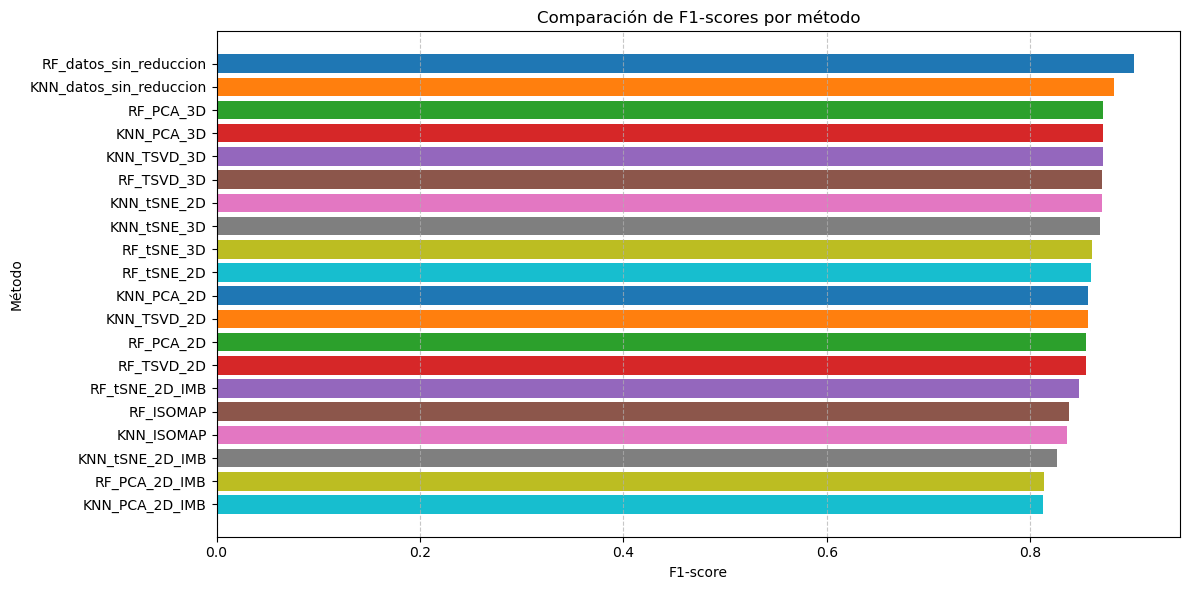

In [170]:
import matplotlib.pyplot as plt
from matplotlib import cm
nombres_metodos = [ "RF_datos_sin_reduccion", "KNN_datos_sin_reduccion", "RF_PCA_2D", "KNN_PCA_2D", "RF_PCA_3D", "KNN_PCA_3D", 
                   "RF_TSVD_2D", "KNN_TSVD_2D", "RF_TSVD_3D", "KNN_TSVD_3D", "RF_ISOMAP", "KNN_ISOMAP", "RF_tSNE_2D", "KNN_tSNE_2D", 
                   "RF_tSNE_3D", "KNN_tSNE_3D", "RF_PCA_2D_IMB", "KNN_PCA_2D_IMB", "RF_tSNE_2D_IMB", "KNN_tSNE_2D_IMB"]
    
resultados = [RF_datos_sin_reduccion, KNN_datos_sin_reduccion, RF_PCA_2D, KNN_PCA_2D, RF_PCA_3D, KNN_PCA_3D, RF_TSVD_2D, 
              KNN_TSVD_2D, RF_TSVD_3D, KNN_TSVD_3D, RF_ISOMAP, KNN_ISOMAP, RF_tSNE_2D, KNN_tSNE_2D, RF_tSNE_3D, KNN_tSNE_3D,
              RF_PCA_2D_IMB, KNN_PCA_2D_IMB, RF_tSNE_2D_IMB, KNN_tSNE_2D_IMB]

# Combinamos los métodos con sus F1-scores y los ordenamos
metodos_f1 = sorted(zip(nombres_metodos, resultados), key=lambda x: x[1], reverse=True)
metodos_ordenados, f1_scores_ordenados = zip(*metodos_f1)

# Gráfica de barras
plt.figure(figsize=(12, 6))
plt.barh(metodos_ordenados, f1_scores_ordenados, color=cm.tab10.colors)
plt.xlabel("F1-score")
plt.ylabel("Método")
plt.title("Comparación de F1-scores por método")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostramos la gráfica
plt.show()

Por lo que vemos que la reducción de dimensionalidad no ayuda a que mejore el clasificación, pero, de hacerla, los métodos que mejor funcionan son la reducción PCA y Truncated SVD en 3 dimensiones, que ya hemos visto que obtienen resultados muy similares, y después tendríamos la de t-SNE, pues en la visualización vemos que divide bastante bien las clases.  
Los peores son los de Imbalanced Learning, y los de la reducción ISOMAP.

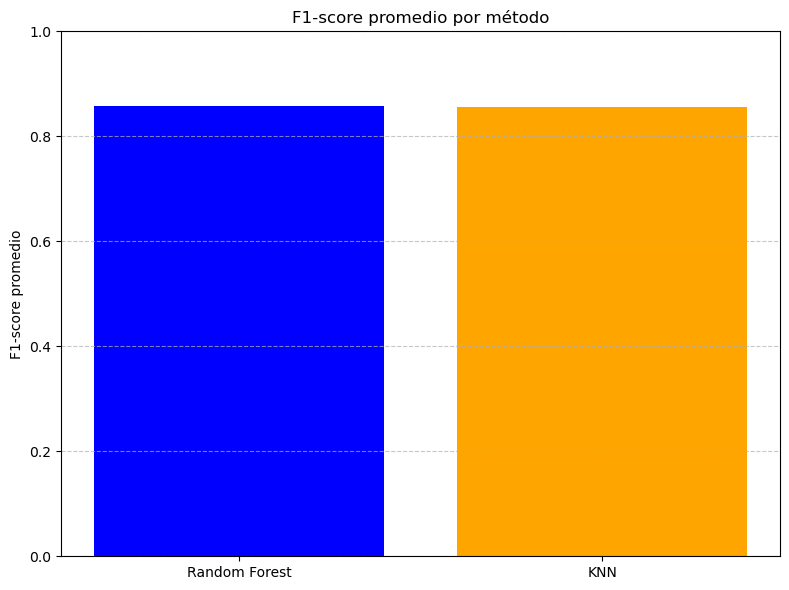

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Calculamos la media de F1-scores por método
rf_scores = [score for metodo, score in zip(nombres_metodos, resultados) if "RF" in metodo]
knn_scores = [score for metodo, score in zip(nombres_metodos, resultados) if "KNN" in metodo]

rf_mean = np.mean(rf_scores)
knn_mean = np.mean(knn_scores)

# Datos para la gráfica
metodos = ["Random Forest", "KNN"]
mean_scores = [rf_mean, knn_mean]

# Gráfica de barras vertical
plt.figure(figsize=(8, 6))
plt.bar(metodos, mean_scores, color=['blue', 'orange'])
plt.ylabel("F1-score promedio")
plt.title("F1-score promedio por método")
plt.ylim(0, 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostramos la gráfica
plt.show()


Vemos que los 2 métodos tienen f1_scores muy parecidos de media, aunque la de RandomForestClassifier es levemente mayor